In [7]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [15]:

df=pd.read_csv("Downloads/amazon_sales_data 2025.csv")

df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [17]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [25]:
df['Product'].unique

<bound method Series.unique of 0      Running Shoes
1         Headphones
2      Running Shoes
3      Running Shoes
4         Smartwatch
           ...      
245          T-Shirt
246            Jeans
247          T-Shirt
248       Smartwatch
249       Smartphone
Name: Product, Length: 250, dtype: object>

In [29]:
df['Category'].unique




<bound method Series.unique of 0         Footwear
1      Electronics
2         Footwear
3         Footwear
4      Electronics
          ...     
245       Clothing
246       Clothing
247       Clothing
248    Electronics
249    Electronics
Name: Category, Length: 250, dtype: object>

In [31]:
df['Customer Name'].unique


<bound method Series.unique of 0         Emma Clark
1      Emily Johnson
2           John Doe
3      Olivia Wilson
4         Emma Clark
           ...      
245    Daniel Harris
246    Sophia Miller
247      Chris White
248    Emily Johnson
249    Emily Johnson
Name: Customer Name, Length: 250, dtype: object>

In [33]:
df['Customer Location'].unique



<bound method Series.unique of 0           New York
1      San Francisco
2             Denver
3             Dallas
4           New York
           ...      
245            Miami
246           Dallas
247           Denver
248         New York
249          Seattle
Name: Customer Location, Length: 250, dtype: object>

In [57]:
sales_per_day = df.groupby('Date')['Total Sales'].sum().reset_index()
sales_per_day



,Date,Total Sales
0,01-03-25,1800
1,01-04-25,320
2,02-02-25,3600
3,02-03-25,4575
4,02-04-25,3100
5,03-02-25,3360
6,03-03-25,120
7,04-02-25,6815
8,04-03-25,5900
9,05-02-25,5400


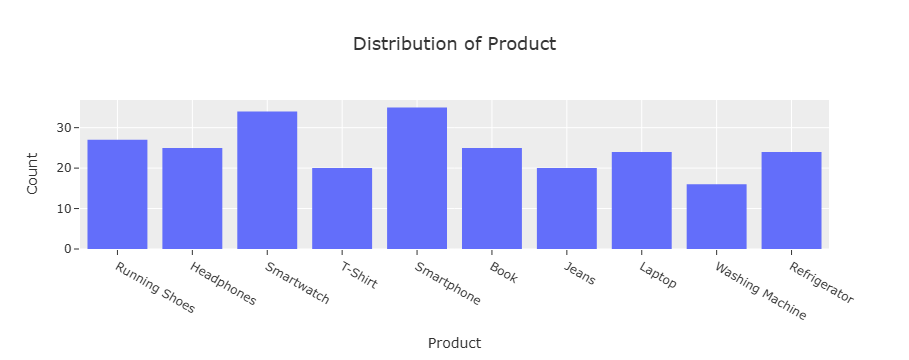

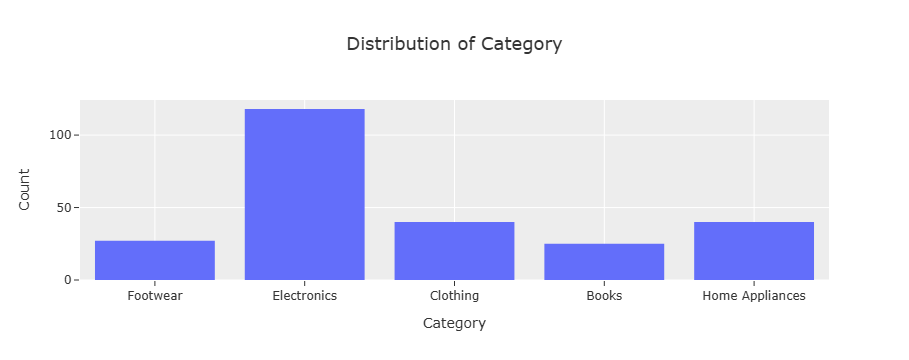

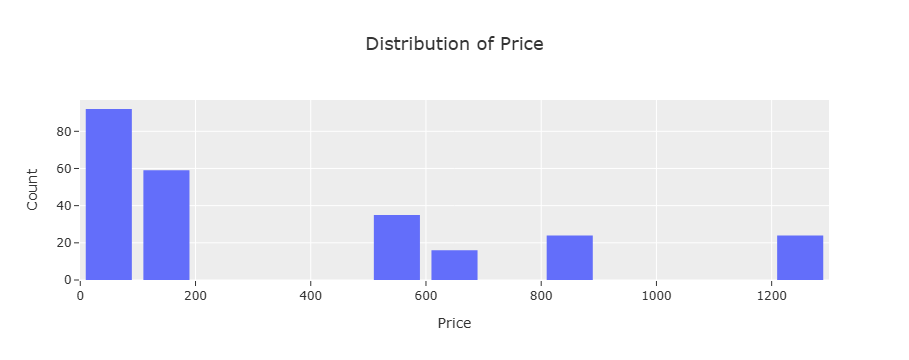

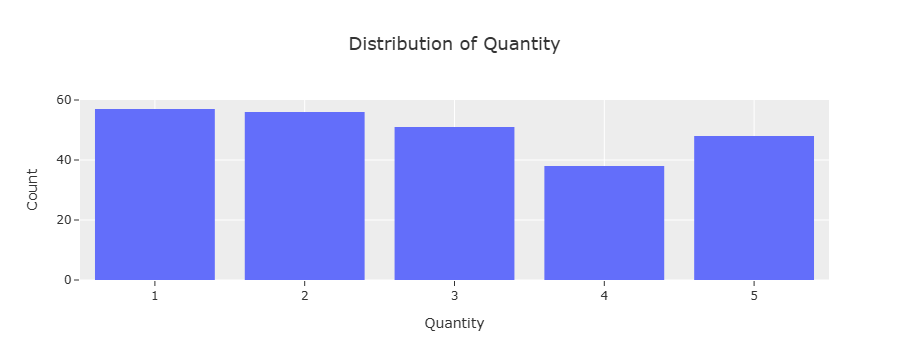

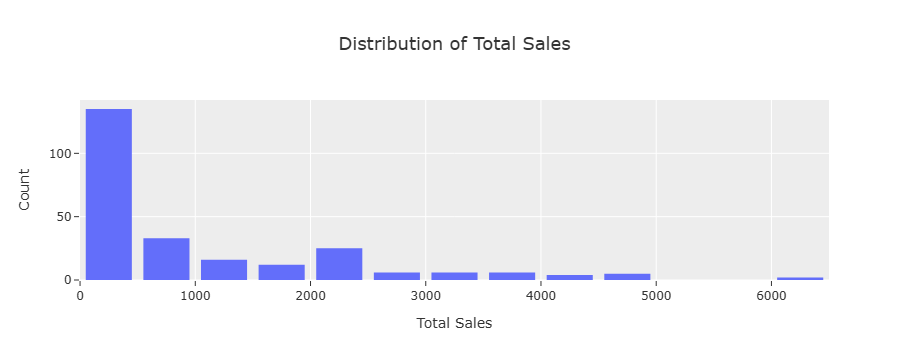

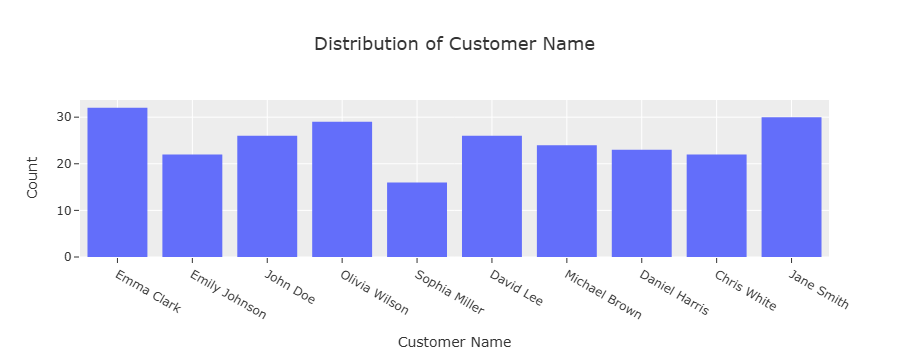

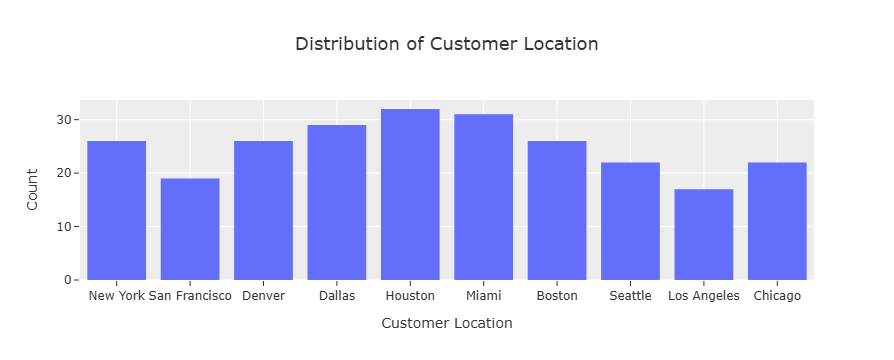

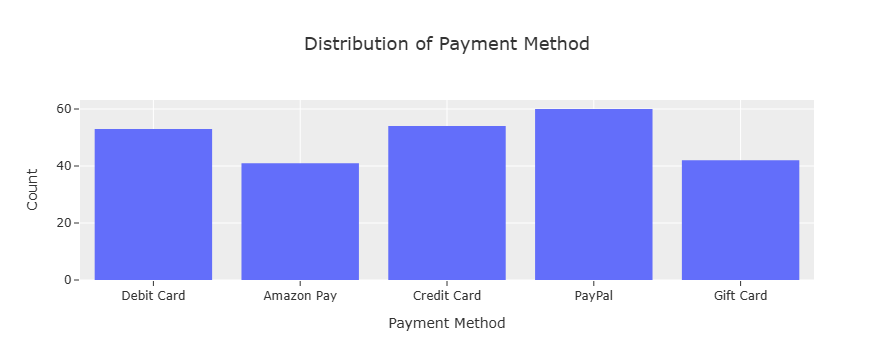

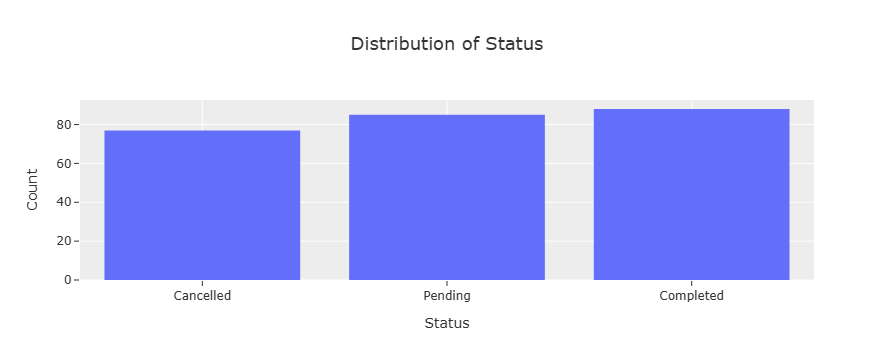

In [55]:
columns=['Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status']
for column in columns:
    fig = px.histogram(data_frame=df, x=column, title=f"Distribution of {column}", 
                       color_discrete_sequence=['#636EFA'], template='ggplot2')
    fig.update_layout(title_font_size=18, xaxis_title=column, yaxis_title="Count", 
                      title_x=0.5, bargap=0.2)
    fig.show()
    

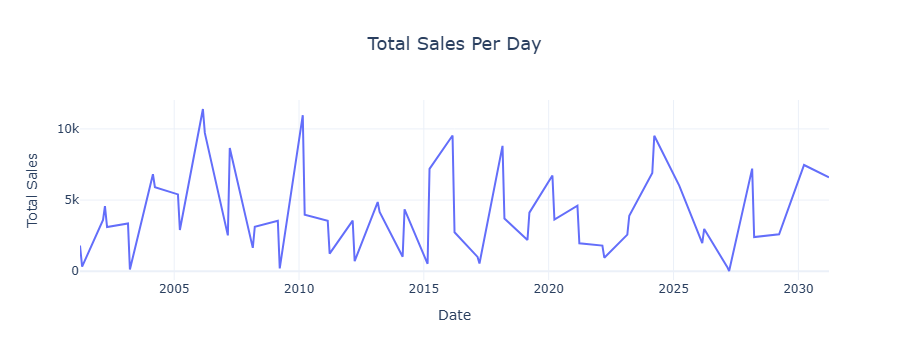

In [37]:

# Group by 'Date' and calculate total sales per day
sales_per_day = df.groupby('Date')['Total Sales'].sum().reset_index()

# Create a line plot using Plotly
fig = px.line(sales_per_day, x='Date', y='Total Sales', title='Total Sales Per Day',
              labels={'Date': 'Date', 'Total Sales': 'Total Sales'},
              template='plotly_white')
fig.update_layout(title_font_size=18, title_x=0.5)
fig.show()

In [39]:
def lineplot_category(category):
    # Group by 'Date' and category, calculate total sales per day
    sales_by_category = df.groupby(['Date', category])['Total Sales'].sum().reset_index()

    # Create a line plot using Plotly
    fig = px.line(sales_by_category, x='Date', y='Total Sales', 
                  color=category,
                  title=f'Total Sales Per Day by {category}',
                  labels={'Date': 'Date', 'Total Sales': 'Total Sales'},
                  template='plotly_white')
    
    fig.update_layout(title_font_size=18, title_x=0.5)
    fig.show()

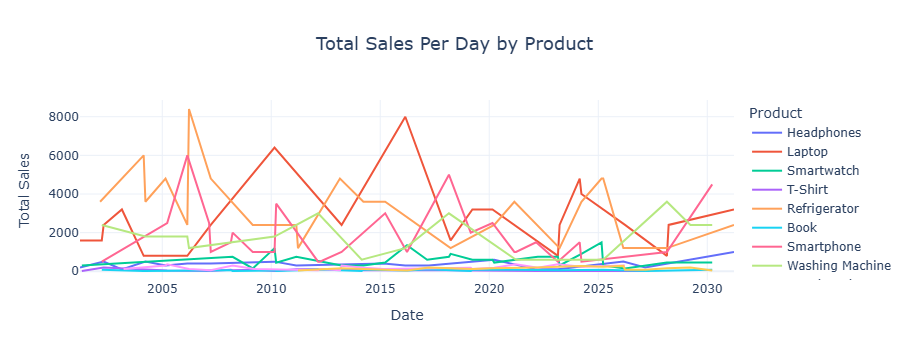

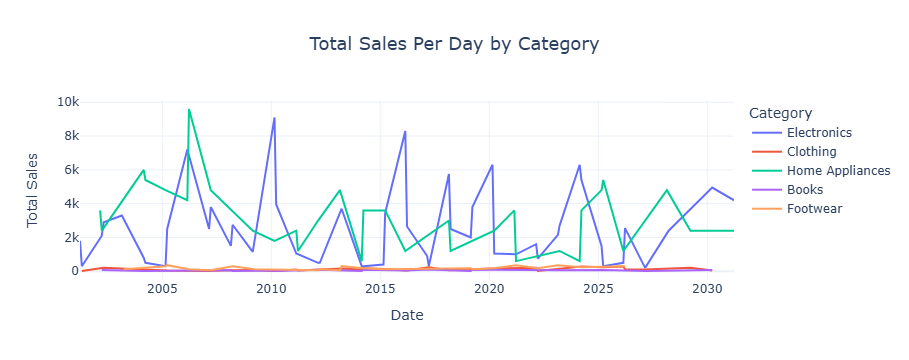

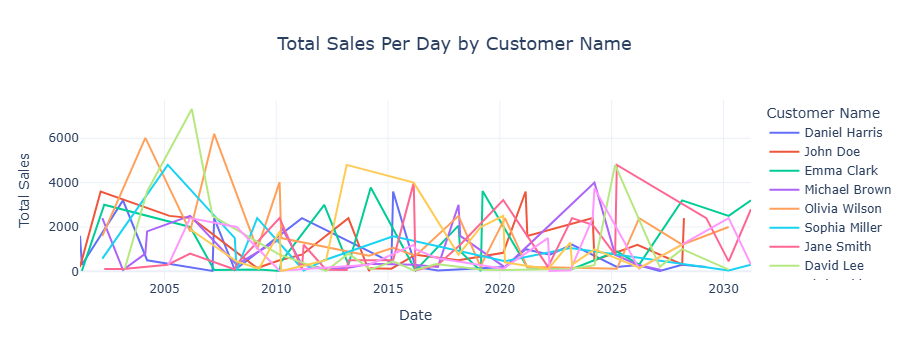

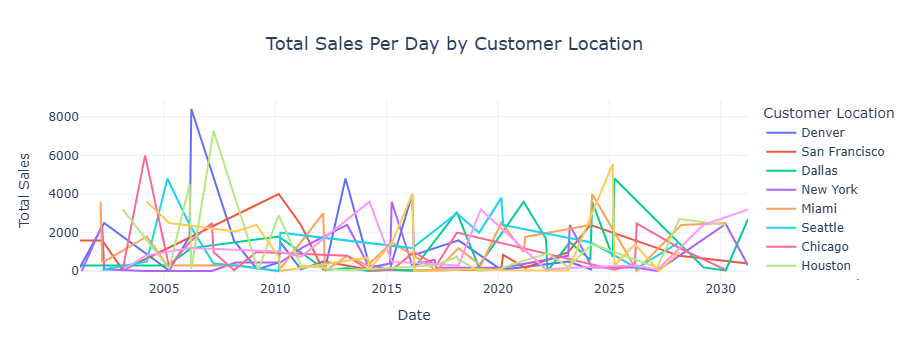

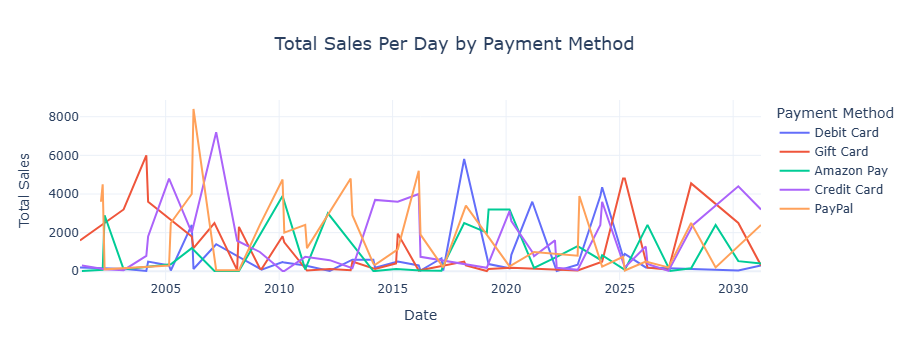

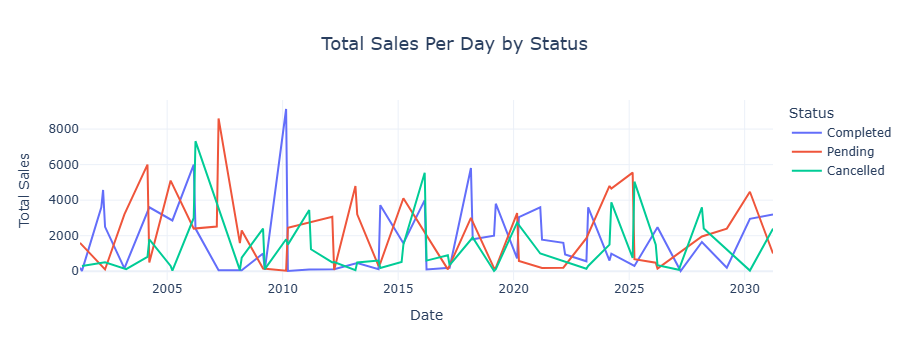

In [41]:
categorical_variables=['Product', 'Category','Customer Name', 'Customer Location', 'Payment Method','Status']
for category in categorical_variables:
    lineplot_category(category)

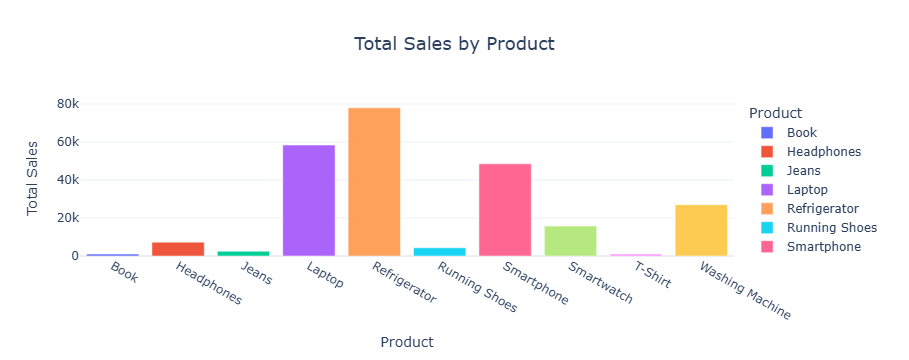

In [43]:
fig = px.bar(df.groupby('Product')['Total Sales'].sum().reset_index(), 
             x='Product', 
             y='Total Sales',
             title='Total Sales by Product',
             color="Product",
             template='plotly_white')

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_title='Product',
    yaxis_title='Total Sales'
)

fig.show()



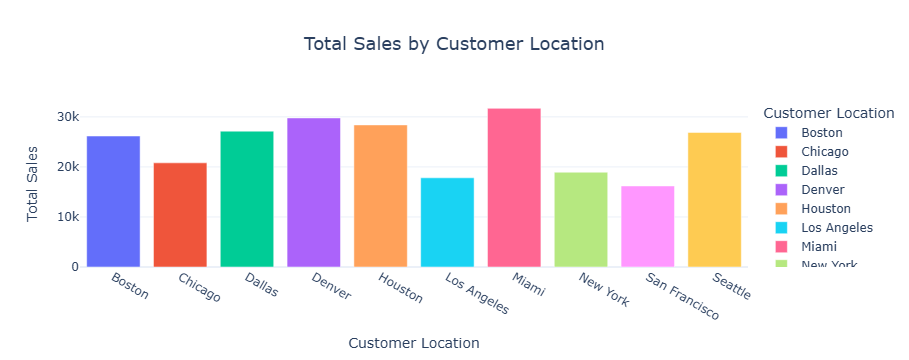

In [45]:
fig = px.bar(df.groupby('Customer Location')['Total Sales'].sum().reset_index(), 
             x='Customer Location', 
             y='Total Sales',
             title='Total Sales by Customer Location',
             color="Customer Location",
             template='plotly_white')

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_title='Customer Location',
    yaxis_title='Total Sales'
)

fig.show()


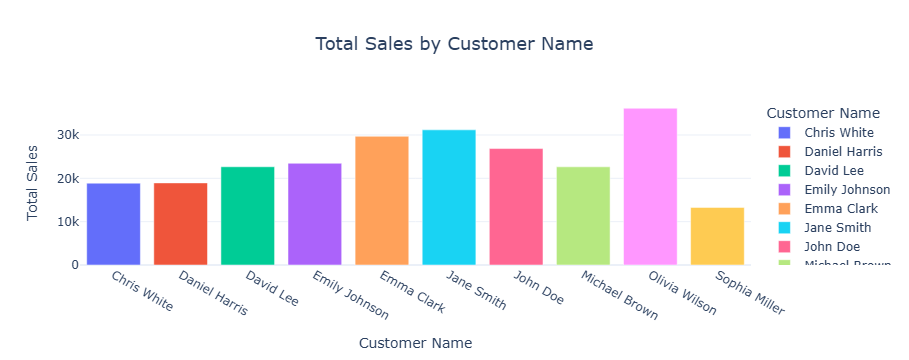

In [47]:
fig = px.bar(df.groupby('Customer Name')['Total Sales'].sum().reset_index(), 
             x='Customer Name', 
             y='Total Sales',
             title='Total Sales by Customer Name',
             color="Customer Name",
             template='plotly_white')

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_title='Customer Name',
    yaxis_title='Total Sales'
)

fig.show()

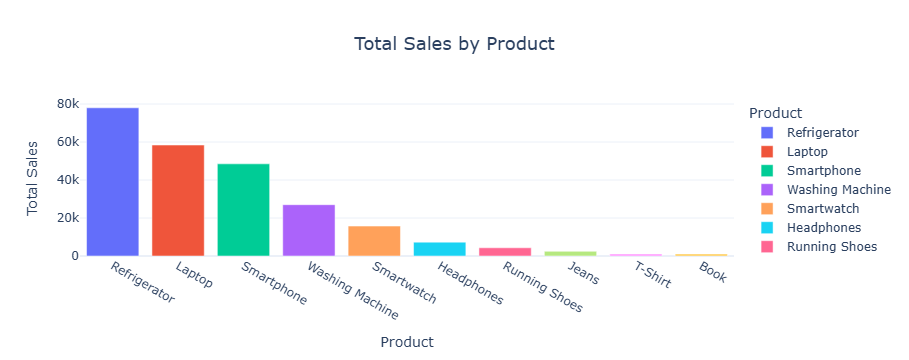

In [59]:
sales_by_product = df.groupby('Product')['Total Sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values('Total Sales', ascending=False)

fig = px.bar(sales_by_product, 
             x='Product', 
             y='Total Sales',
             title='Total Sales by Product',
             color='Product',
             template='plotly_white')

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_title='Product',
    yaxis_title='Total Sales'
)

fig.show()

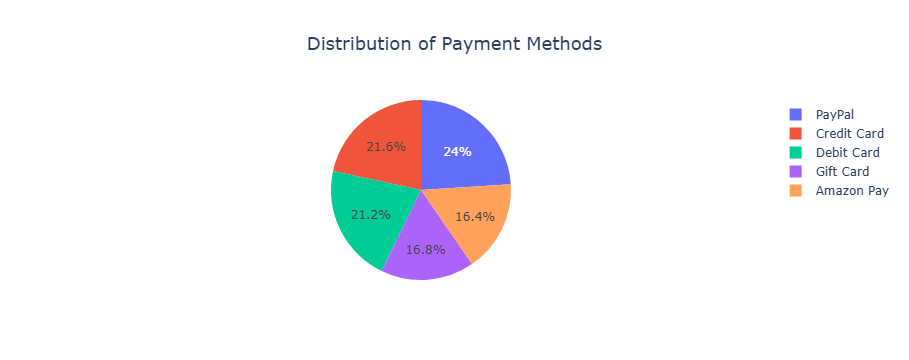

In [49]:
# Create pie chart of payment methods
fig = px.pie(df, 
             names='Payment Method',
             title='Distribution of Payment Methods',
             template='plotly_white')

fig.update_layout(
    title_font_size=18,
    title_x=0.5
)

fig.show()